# Identify Duplicates Docuemnts and Most Like

Use a pretty simple algoirthm based on the text vectorization to find duplicate documents.

## Config

In [1]:
n_words_to_check = 1000 # How many words should we be looking at to tell?

duplicate_cut = 0.95 # How close to 1 do two documents have to be to be duplicates?

## Setup

In [2]:
from config import text_file_info, extra_stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import _check_stop_list

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

stopwords = list(_check_stop_list('english')) + extra_stopwords

## Text Loading and Vectorizing

In [3]:
files_by_area = list(text_file_info())

In [4]:
vectorizer = TfidfVectorizer(input='filename',
                             max_df=0.5, max_features=n_words_to_check,
                             min_df=2,
                             stop_words=stopwords,
                             use_idf=True)

In [5]:
%%time
files_in_order = [f[2] for f in files_by_area]
x = vectorizer.fit_transform(files_in_order)

CPU times: user 3.47 s, sys: 639 ms, total: 4.11 s
Wall time: 10.5 s


## Construct an adjacency matrix

`x` is the list of vectors, one per document. We now need to basically calculate the vector distance ($\sqrt{x_1 x_2}$) between documents represented by vectors $x_1$ and $x_2$. We can do this by doing the transpose of the matrix `x` times itself.

Of course, a document is most similar to itself in this - so the diagonal of this matrix will be 1's.

The basics for this were taken from a [stackoverflow](https://stackoverflow.com/questions/8897593/how-to-compute-the-similarity-between-two-text-documents/8897648#8897648) question.

In [6]:
similarity = (x*x.T).A
np.fill_diagonal(similarity, np.nan)

In [7]:
def make_similarity_df(sim_matrix, files_in_order, index: int):
    'Get the similarity dataframe. index is 0, get back document itself, 1 most similar, 2 second most...'
    similar_index = np.argsort(similarity, axis=1)[:,-1-index]
    similar_score = np.sort(similarity, axis=1)[:,-1-index]

    all_scores = [
        {
            's_score': s_score,
            'f_name': f_name,
            'similar_name': files_in_order[s_index]
        }
        for f_name, s_score, s_index in zip(files_in_order, similar_score, similar_index) 
    ]
    return pd.DataFrame(all_scores)

In [8]:
similar_list = [make_similarity_df(similarity, files_in_order, next_most) for next_most in range(1, 6)]

## Plots and lists

Lets look as these scores first to see how good or bad they look

In [9]:
def plot_and_dump(df, index):
    plt.figure(figsize=(13, 7))
    plt.hist(df.s_score, bins=100, range=(0, 1.0))
    plt.xlabel('Similarity')
    plt.title(f'Document similarity (closest {index} similarity)')
    plt.show()

    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(df[df.s_score > duplicate_cut].sort_values('s_score'))

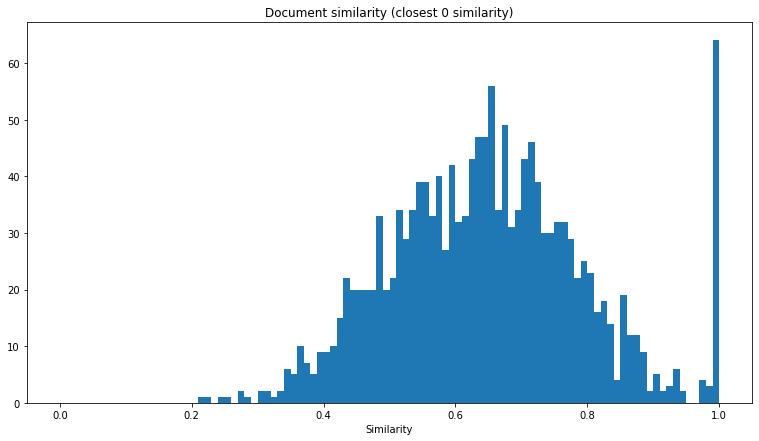

,s_score,f_name,similar_name
796,0.974524,loi-text/EF/SNOWMASS21-EF2_EF0_Yu_Gao-251.txt,loi-text/EF/SNOWMASS21-EF2_EF0-136.txt
790,0.974524,loi-text/EF/SNOWMASS21-EF2_EF0-136.txt,loi-text/EF/SNOWMASS21-EF2_EF0_Yu_Gao-251.txt
55,0.979356,loi-text/AF/SNOWMASS21-AF2_AF0_pellico-158.txt,loi-text/RF/SNOWMASS21-RF6_RF0_pellico-029.txt
1457,0.979356,loi-text/RF/SNOWMASS21-RF6_RF0_pellico-029.txt,loi-text/AF/SNOWMASS21-AF2_AF0_pellico-158.txt
1427,0.980706,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Franco_...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1430,0.989319,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1429,0.989895,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
107,0.992263,loi-text/AF/SNOWMASS21-AF5_AF0-RF5_RF0_Prebys2...,loi-text/AF/SNOWMASS21-AF5_AF0-RF5_RF0_Prebys-...
105,0.992263,loi-text/AF/SNOWMASS21-AF5_AF0-RF5_RF0_Prebys-...,loi-text/AF/SNOWMASS21-AF5_AF0-RF5_RF0_Prebys2...
1167,0.998183,loi-text/NF/SNOWMASS21-NF0_NF0_Nick_Solomey-01...,loi-text/NF/SNOWMASS21-NF0_NF0_Nick_Solomey-00...


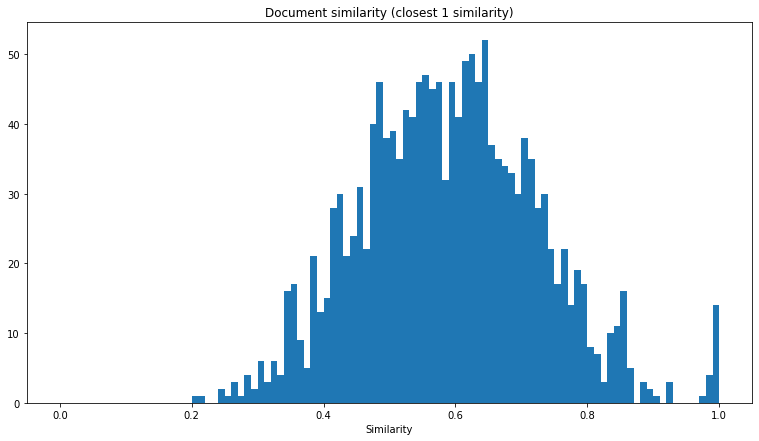

,s_score,f_name,similar_name
1427,0.979773,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Franco_...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1430,0.989287,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0-039.txt
1428,0.989895,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1426,0.989895,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0-039.txt,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1429,0.989895,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0-039.txt
1318,0.999917,loi-text/NF/SNOWMASS21-NF6_NF2_Kenneth_Long-07...,loi-text/NF/SNOWMASS21-NF6_NF2-EF0_EF0-AF2_AF4...
1317,0.999917,loi-text/NF/SNOWMASS21-NF6_NF2-EF0_EF0-AF2_AF4...,loi-text/NF/SNOWMASS21-NF6_NF2_Kenneth_Long-07...
1316,0.999917,loi-text/NF/SNOWMASS21-NF6_NF2-EF0_EF0-AF2_AF4...,loi-text/NF/SNOWMASS21-NF6_NF2_Kenneth_Long-07...
15,1.000000,loi-text/AF/SNOWMASS21-AF1_AF0-061.txt,loi-text/EF/SNOWMASS21-EF1_EF4_Litvinenko-052.txt
752,1.000000,loi-text/EF/SNOWMASS21-EF1_EF0-050.txt,loi-text/EF/SNOWMASS21-EF1_EF4_Litvinenko-052.txt


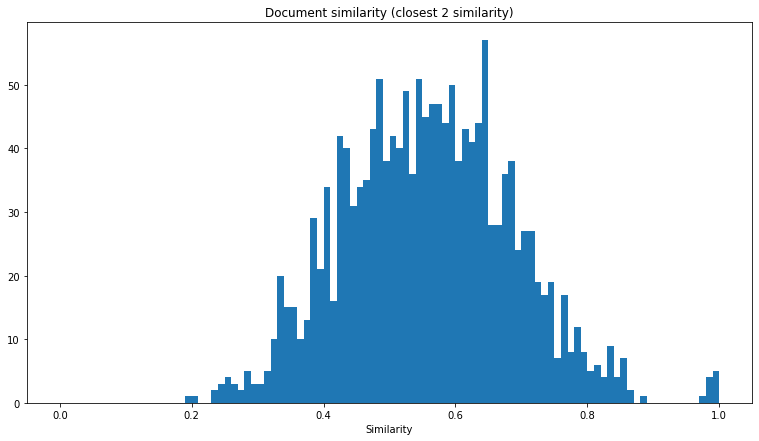

,s_score,f_name,similar_name
1427,0.976211,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Franco_...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1426,0.989287,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0-039.txt,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1428,0.989287,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1430,0.989287,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
1429,0.989319,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...
15,1.000000,loi-text/AF/SNOWMASS21-AF1_AF0-061.txt,loi-text/EF/SNOWMASS21-EF1_EF0-050.txt
70,1.000000,loi-text/AF/SNOWMASS21-AF3_AF6-EF1_EF4_Litvine...,loi-text/AF/SNOWMASS21-AF1_AF0-061.txt
716,1.000000,loi-text/EF/SNOWMASS21-EF0_EF0-AF0_AF0_Vladimi...,loi-text/EF/SNOWMASS21-EF1_EF0-050.txt
752,1.000000,loi-text/EF/SNOWMASS21-EF1_EF0-050.txt,loi-text/AF/SNOWMASS21-AF1_AF0-061.txt
785,1.000000,loi-text/EF/SNOWMASS21-EF1_EF4_Litvinenko-052.txt,loi-text/AF/SNOWMASS21-AF1_AF0-061.txt


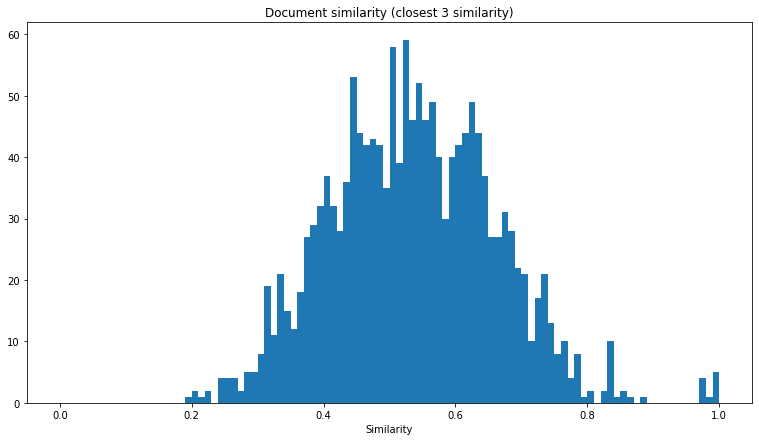

,s_score,f_name,similar_name
1426,0.976211,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0-039.txt,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Franco_...
1427,0.976211,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Franco_...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0-039.txt
1428,0.976211,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Franco_...
1429,0.979773,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Franco_...
1430,0.980706,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Gianant...,loi-text/RF/SNOWMASS21-RF5_RF0-IF4_IF0_Franco_...
15,1.000000,loi-text/AF/SNOWMASS21-AF1_AF0-061.txt,loi-text/EF/SNOWMASS21-EF0_EF0-AF0_AF0_Vladimi...
70,1.000000,loi-text/AF/SNOWMASS21-AF3_AF6-EF1_EF4_Litvine...,loi-text/EF/SNOWMASS21-EF0_EF0-AF0_AF0_Vladimi...
716,1.000000,loi-text/EF/SNOWMASS21-EF0_EF0-AF0_AF0_Vladimi...,loi-text/AF/SNOWMASS21-AF1_AF0-061.txt
752,1.000000,loi-text/EF/SNOWMASS21-EF1_EF0-050.txt,loi-text/EF/SNOWMASS21-EF0_EF0-AF0_AF0_Vladimi...
785,1.000000,loi-text/EF/SNOWMASS21-EF1_EF4_Litvinenko-052.txt,loi-text/EF/SNOWMASS21-EF0_EF0-AF0_AF0_Vladimi...


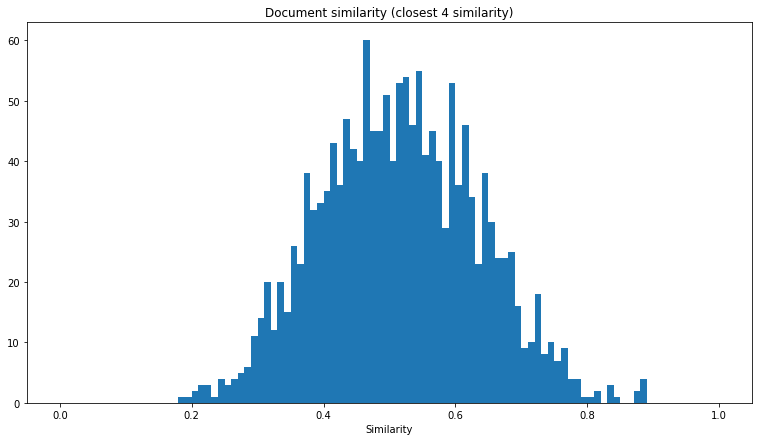

,s_score,f_name,similar_name


In [10]:
for index, df in enumerate(similar_list):
    plot_and_dump(df, index)

And the total number of duplicates by this criteria:

In [11]:
sum([len(df[df.s_score > duplicate_cut]) for df in similar_list])

140